In [8]:
import os
from os.path import join, exists, basename, dirname, expanduser
from glob import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import rioxarray as rxa
from scipy import stats

netcdf_fps = '/bsuhome/zacharykeskinen/scratch/data/uavsar/images/vv_coherence'
with open(expanduser('~/scratch/data/uavsar/image_fps'), 'rb') as f:
    image_fps = pickle.load(f)

image_fps = [f for f in image_fps if f['fp'].endswith('.unw.grd.tiff')]

data_fp = '/bsuhome/zacharykeskinen/scratch/data/uavsar/coherence'
with open(join(data_fp,'cor_vv_3.pkl'), 'rb') as f:
    cor_vv = pickle.load(f)

In [61]:
from scipy.optimize import curve_fit

def temp_model(T, tau):
    return np.exp(-T/tau) + 0.35
temp_model_v = np.vectorize(temp_model)

def tau(cors, days):
    if np.sum(np.isnan(cors)) == 0:
        s = curve_fit(temp_model, days, cors, 5)[0][0]
        return s
    else:
        return np.nan

In [62]:
imgs_dir = '/bsuhome/zacharykeskinen/scratch/data/uavsar/images/'
for loc, ds in cor_vv.items():
    for fps in glob(join(imgs_dir, loc.replace('_',' '), '*_grd')):
        band = '_'.join(basename(fps).split('_')[:-5])
        if band not in list(ds.band.values):
            if len(glob(join(fps,'*VV*cor*'))) == 1:
                print(band)
                im = rxa.open_rasterio(glob(join(fps,'*VV*cor*'))[0]).rio.reproject_match(cor_vv[loc])
                im = rxa.open_rasterio(glob(join(fps,'*VV*cor*'))[0]).rio.reproject_match(cor_vv[loc])
                im = im.assign_coords(band = [band])
                new = xr.Dataset()
                new['cor_vv'] = im
                cor_vv[loc] = xr.merge([cor_vv[loc], new])
            else:
                print(band)

grmesa_27416_20003-028_20008-004_0018d
grmesa_27416_20003-028_20017-006_0040d
grmesa_27416_20003-028_20013-004_0025d


In [63]:
# with open(join(data_fp,'cor_vv_5.pkl'), 'wb') as f:
#     pickle.dump(cor_vv, f)

In [86]:
np.nanmean(cors[(incs < np.deg2rad(60)) & (incs > np.deg2rad(40))])

0.5905996305702573

In [89]:
sub

<xarray.Dataset>
Dimensions:      (y: 3891, x: 3847)
Coordinates:
    band         <U38 'uticam_21003_21004-002_21013-003_0034d'
  * y            (y) float64 47.28 47.28 47.28 47.28 ... 46.41 46.41 46.41 46.41
  * x            (x) float64 -110.6 -110.6 -110.6 ... -109.7 -109.7 -109.7
    lon          (x) float64 -110.6 -110.6 -110.6 ... -109.7 -109.7 -109.7
    lat          (y) float64 47.28 47.28 47.28 47.28 ... 46.41 46.41 46.41 46.41
    spatial_ref  int64 0
Data variables:
    cor_vv       (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    210-inc      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    tree-height  (y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    tree-perc    (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    biomass      (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    landcover    (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    elev         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    description:  Coherence for VV over lowman

In [93]:
sub['landcover']

<xarray.DataArray 'landcover' (y: 1672, x: 1226)>
array([[nan, nan, nan, ..., 42., 42., 42.],
       [nan, nan, nan, ..., 42., 42., 52.],
       [nan, nan, nan, ..., 42., 52., 42.],
       ...,
       [42., 42., 42., ..., nan, nan, nan],
       [42., 42., 42., ..., nan, nan, nan],
       [42., 42., 42., ..., nan, nan, nan]])
Coordinates:
    band         <U38 'alamos_35915_20005-003_20008-000_0007d'
  * y            (y) float64 36.06 36.06 36.06 36.06 ... 35.71 35.71 35.71 35.71
  * x            (x) float64 -106.6 -106.6 -106.6 ... -106.3 -106.3 -106.3
    lon          (x) float64 -106.6 -106.6 -106.6 ... -106.3 -106.3 -106.3
    lat          (y) float64 36.06 36.06 36.06 36.06 ... 35.71 35.71 35.71 35.71
    spatial_ref  int64 0
Attributes:
    LAYER_TYPE:                 thematic
    OVERVIEWS_ALGORITHM:        IMAGINE Nearest Neighbor Resampling
    STATISTICS_EXCLUDEDVALUES:  
    STATISTICS_HISTOBINVALUES:  7853863229|0|0|0|0|0|0|0|0|0|0|472399232|9624...
    STATISTICS_HISTOMAX:        255
    STATISTICS_HISTOMIN:        0
    STATISTICS_HISTONUMBINS:    256
    STATISTICS_MAXIMUM:         95
    STATISTICS_MEAN:            30.412349783312
    STATISTICS_MEDIAN:          21
    STATISTICS_MINIMUM:         0
    STATISTICS_MODE:            0
    STATISTICS_SKIPFACTORX:     1
    STATISTICS_SKIPFACTORY:     1
    STATISTICS_STDDEV:          32.689899151583
    scale_factor:               1.0
    add_offset:                 0.0
    long_name:                  Layer_1
    _FillValue:                 255

In [100]:
cor_vv.keys()

dict_keys(['Utica,_MT', 'Rocky_Mountains_NP,_CO', 'Ironton,_CO', 'Eldorado_National_Forest,_CA', 'Fraser,_CO', 'Sierra_National_Forest,_CA', 'Silver_City,_ID', 'Grand_Mesa,_CO', 'Peeler_Peak,_CO', 'Salt_Lake_City,_UT', 'Lowman,_CO', 'Los_Alamos,_NM'])

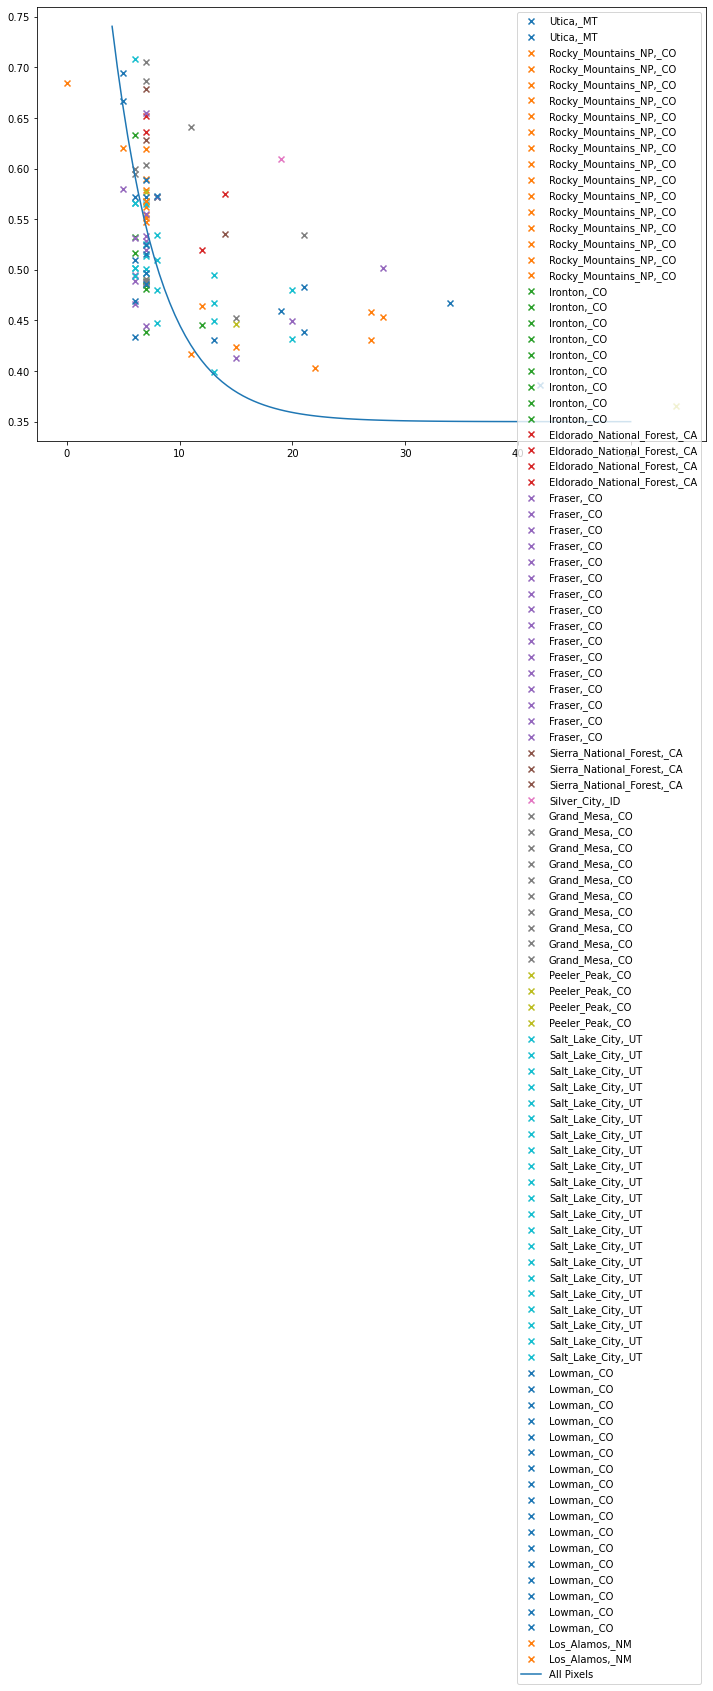

In [106]:

xs = []
ys = []
xs_best = []
ys_best = []
plt.subplots(figsize = (12,8))
for i, (loc, ds) in enumerate(cor_vv.items()):
    for b in list(ds.band.values):
        sub = ds.sel({'band':b})
        days = int(b.split('_')[-1][:-1])
        cor_mean = sub['cor_vv'].mean().values
        inc_col = [dv for dv in list(sub.data_vars) if 'inc' in dv][0]
        cors = sub['cor_vv'].values.ravel()
        incs = sub[inc_col].values.ravel()
        trees = sub['tree-perc'].values.ravel()
        lc = sub['landcover'].values.ravel()
        cond = (incs < np.deg2rad(60)) & (incs > np.deg2rad(40)) & (trees < 10) & (lc == 71)
        cor_best = np.nanmean(cors[cond])
        plt.scatter(days, cor_mean, marker = 'x', color = f'C{i}', label = loc)
        # plt.scatter(days, cor_best, color = 'black', marker = 'x')
        xs.append(days)
        xs_best.append(days)
        ys.append(cor_mean)
        ys_best.append(cor_best)
xline = np.linspace(4, 50, 100)
plt.plot(xline, temp_model_v(xline, tau(ys, xs)), color = 'C0', label = 'All Pixels')
# plt.plot(xline, temp_model_v(xline, tau(ys_best, xs)), color = 'black', label = 'Treeless. 40-60° Inc Angle')
plt.legend()